# Structure for Customer Preference Analysis


**Name: Ahonon Gobi**

## Title: Customer Preference Analysis and Product Suggestions in Grocery Management Using Fuzzy Clustering


## Problem Definition
Understanding customer preferences is crucial for optimizing inventory management, personalizing marketing strategies, and improving overall customer satisfaction. In this project, I aim to analyze a dataset of customer purchases to identify distinct groups of customers and suggest products that cater to their tastes.


## Data Collection
For this analysis, I will create a synthetic dataset that simulates customer purchasing behavior. The dataset will contain the following features:
- `CustomerID`: Unique identifier for each customer.
- `ProductA`, `ProductB`, `ProductC`, `ProductD`: Representing the preference ratings (1-5) for different products.


### Data creation

In [8]:
import pandas as pd

# Creating a synthetic dataset
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'ProductA': [5, 3, 4, 2, 1],
    'ProductB': [1, 5, 4, 3, 2],
    'ProductC': [2, 2, 5, 4, 3],
    'ProductD': [3, 1, 2, 5, 4]
}
df = pd.DataFrame(data)
print(df)

   CustomerID  ProductA  ProductB  ProductC  ProductD
0           1         5         1         2         3
1           2         3         5         2         1
2           3         4         4         5         2
3           4         2         3         4         5
4           5         1         2         3         4


## Methods

## Fuzzy C-Means Clustering
I will apply the fuzzy c-means clustering algorithm to group customers based on their preferences. The steps involved are as follows:

Data Preprocessing: Normalize the data to ensure uniformity in scale.
Apply Fuzzy Clustering: Use the fuzzy c-means algorithm to classify customers into segments.


In [9]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz # This will work if scikit-fuzzy is installed
import matplotlib.pyplot as plt

# Preparing data for fuzzy clustering
data_matrix = df.drop(columns=['CustomerID']).values.T  # Transpose for features

# Applying fuzzy c-means clustering
num_clusters = 2  # Define the number of clusters
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data_matrix, num_clusters, 2, error=0.005, maxiter=1000)

# Get the cluster assignments
cluster_assignments = np.argmax(u, axis=0)
df['Cluster'] = cluster_assignments
print(df)

Defaulting to user installation because normal site-packages is not writeable
   CustomerID  ProductA  ProductB  ProductC  ProductD  Cluster
0           1         5         1         2         3        1
1           2         3         5         2         1        1
2           3         4         4         5         2        1
3           4         2         3         4         5        0
4           5         1         2         3         4        0


### Plot

I will visualize the clusters to better understand the customer segments.

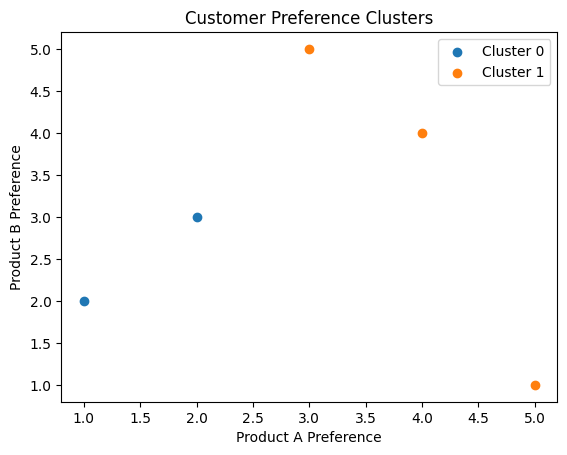

In [10]:
# Plotting the clusters
for i in range(num_clusters):
    plt.scatter(data_matrix[0][df['Cluster'] == i], data_matrix[1][df['Cluster'] == i], label=f'Cluster {i}')

plt.title('Customer Preference Clusters')
plt.xlabel('Product A Preference')
plt.ylabel('Product B Preference')
plt.legend()
plt.show()


The clusters generated from the fuzzy c-means algorithm illustrate distinct groups of customers based on their preferences for different products. 

### Recommendation System

In [11]:
# Generating product recommendations based on cluster centroids
recommendations = {}
for i in range(num_clusters):
    recommendations[f'Cluster {i}'] = data_matrix[:, cluster_assignments == i].mean(axis=1)
print("Recommendations based on clusters:", recommendations)


Recommendations based on clusters: {'Cluster 0': array([1.5, 2.5, 3.5, 4.5]), 'Cluster 1': array([4.        , 3.33333333, 3.        , 2.        ])}
